In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical

In [29]:
# Récupération du dataset CIFAR-10
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Filtre les données pour garder seulement les images d'animaux
animal_classes = [2, 3, 4, 5, 7]
animal_indices = np.isin(y_train_full, animal_classes).flatten()
X_train_filtered = X_train_full[animal_indices]
y_train_filtered = y_train_full[animal_indices]
animal_indices2 = np.isin(y_test, animal_classes).flatten()
X_test_filtered = X_test[animal_indices2]
y_test_filtered = y_test[animal_indices2]

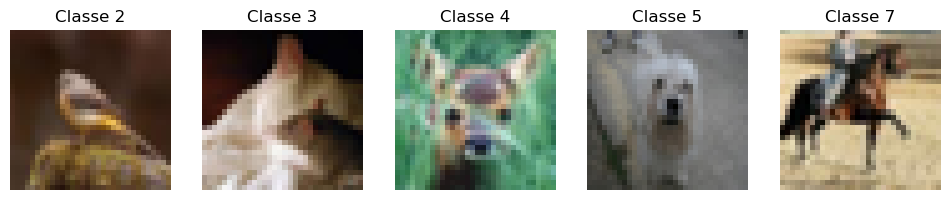

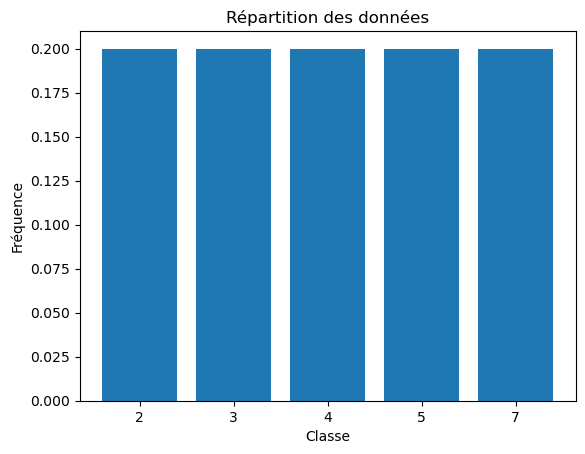

In [3]:
# Affiche une image par classe dans le Notebook
fig, axs = plt.subplots(1, len(animal_classes), figsize=(12, 3))
for i, animal_class in enumerate(animal_classes):
    class_indices = np.where(y_train_filtered == animal_class)[0]
    random_index = np.random.choice(class_indices)
    axs[i].imshow(X_train_filtered[random_index])
    axs[i].set_title(f"Classe {animal_class}")
    axs[i].axis("off")
plt.show()

# Analyse exploratoire du dataset
class_counts = np.unique(y_train_filtered, return_counts=True)
class_labels = [str(label) for label in class_counts[0]]
class_frequencies = class_counts[1] / len(y_train_filtered)

plt.bar(class_labels, class_frequencies)
plt.xlabel("Classe")
plt.ylabel("Fréquence")
plt.title("Répartition des données")
plt.show()

In [35]:
# Séparation des données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_filtered, y_train_filtered, test_size=0.2)

print(y_train)

# Prétraitement des données
y_train = keras.utils.to_categorical(y_train, 10)
print(y_train)
y_val = keras.utils.to_categorical(y_val, 10)
X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0
X_test_filtered = X_test_filtered.astype("float32") / 255.0

[[2]
 [7]
 [5]
 ...
 [2]
 [3]
 [3]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
# Construction du modèle MLP
mlp_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

# Compilation et entraînement du modèle MLP
mlp_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
mlp_history = mlp_model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30


ValueError: in user code:

    File "C:\Users\pierr\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\pierr\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\pierr\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\pierr\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\pierr\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\pierr\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\pierr\anaconda3\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\pierr\anaconda3\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\pierr\anaconda3\lib\site-packages\keras\src\losses.py", line 2354, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "C:\Users\pierr\anaconda3\lib\site-packages\keras\src\backend.py", line 5762, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(320,) and logits.shape=(32, 10)


In [ ]:
# Construction du modèle CNN
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

# Compilation et entraînement du modèle CNN
cnn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
cnn_history = cnn_model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

In [ ]:
# Évaluation des modèles sur les ensembles de validation et de test
mlp_val_loss, mlp_val_accuracy = mlp_model.evaluate(X_val, y_val)
mlp_test_loss, mlp_test_accuracy = mlp_model.evaluate(X_test_filtered, y_test_filtered)
cnn_val_loss, cnn_val_accuracy = cnn_model.evaluate(X_val, y_val)
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test_filtered, y_test_filtered)

# Rapport de classification pour les modèles MLP et CNN
mlp_pred = np.argmax(mlp_model.predict(X_test_filtered), axis=-1)
cnn_pred = np.argmax(cnn_model.predict(X_test_filtered), axis=-1)

mlp_classification_report = classification_report(y_test_filtered, mlp_pred)
cnn_classification_report = classification_report(y_test_filtered, cnn_pred)

print("Rapport de classification MLP :")
print(mlp_classification_report)
print("-----------------------------------------")
print("Rapport de classification CNN :")
print(cnn_classification_report)

# Matrice de confusion pour les modèles MLP et CNN
mlp_confusion_matrix = confusion_matrix(y_test_filtered, mlp_pred)
cnn_confusion_matrix = confusion_matrix(y_test_filtered, cnn_pred)

print("Matrice de confusion MLP :")
print(mlp_confusion_matrix)
print("-----------------------------------------")
print("Matrice de confusion CNN :")
print(cnn_confusion_matrix)

# Visualisation des performances des modèles
plt.plot(mlp_history.history["accuracy"], label="MLP - Entraînement")
plt.plot(mlp_history.history["val_accuracy"], label="MLP - Validation")
plt.plot(cnn_history.history["accuracy"], label="CNN - Entraînement")
plt.plot(cnn_history.history["val_accuracy"], label="CNN - Validation")
plt.title("Précision des modèles")
plt.xlabel("Epochs")
plt.ylabel("Précision")
plt.legend()
plt.show()

In [ ]:
# Remédier à l'overfitting en utilisant le dropout et l'early stopping
dropout_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

early_stopping = keras.callbacks.EarlyStopping(patience=3)

dropout_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
dropout_history = dropout_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Évaluation du modèle avec dropout sur les ensembles de test
dropout_val_loss, dropout_val_accuracy = dropout_model.evaluate(X_val, y_val)
dropout_test_loss,dropout_test_accuracy = dropout_model.evaluate(X_test_filtered, y_test_filtered)

In [ ]:
# Conclusion sur les résultats obtenus
print("Précision du modèle MLP sur l'ensemble de validation :", mlp_val_accuracy)
print("Précision du modèle MLP sur l'ensemble de test :", mlp_test_accuracy)
print("Précision du modèle CNN sur l'ensemble de validation :", cnn_val_accuracy)
print("Précision du modèle CNN sur l'ensemble de test :", cnn_test_accuracy)
print("Précision du modèle avec dropout sur l'ensemble de validation :", dropout_val_accuracy)
print("Précision du modèle avec dropout sur l'ensemble de test :", dropout_test_accuracy)